<a href="https://colab.research.google.com/github/Birkbeck/msc-projects-2023-4-Gabriele_Monti_PEFT/blob/main/Attention_Demostration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Colab notebook, there is a simple demonstration of how the attention mechanism works. It provides a step-by-step explanation and implementation using neural networks to create the KQV matrices and visualize the attention scores for better understanding. This colab also includes visual comparisons to illustrate the effect of attention on word embeddings.
The code provided is from the tutorial "The Attention Mechanism from Scratch" on Machine Learning Mastery. This tutorial explains the attention mechanism and demonstrates its implementation using Python with NumPy and SciPy. The attention mechanism helps improve the performance of encoder-decoder models by allowing the decoder to focus on relevant parts of the input sequence.

For more details, visit the full tutorial here.
https://machinelearningmastery.com/the-attention-mechanism-from-scratch/

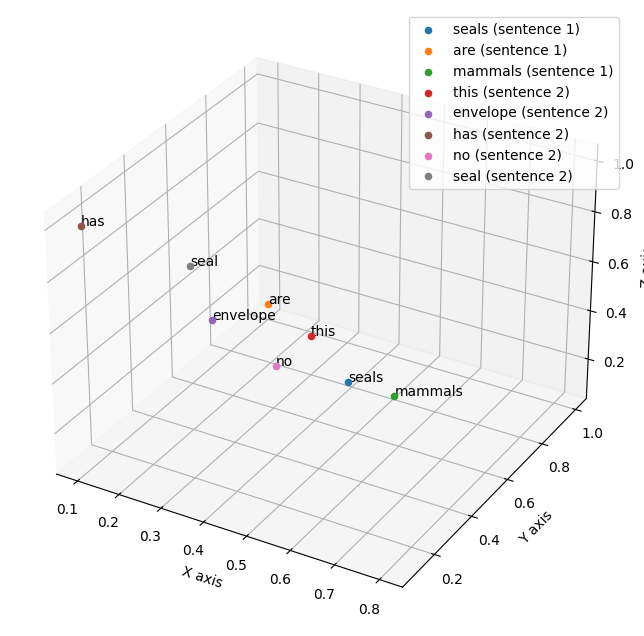

In [ ]:

#This code creates a 3D scatter plot to visualize the embeddings of words from two sentences,
#plotting each word in 3D space and labeling them for identification, and shows the plot using Matplotlib.


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Embeddings for sentence 1
embeddings_1 = {
    "seals": [0.7, 0.1, 0.7],
    "are": [0.1, 1.0, 0.1],
    "mammals": [0.8, 0.1, 0.7]
}

# Embeddings for sentence 2
embeddings_2 = {
    "this": [0.3, 0.8, 0.2],
    "envelope": [0.3, 0.3, 0.6],
    "has": [0.1, 0.1, 1.0],
    "no": [0.4, 0.4, 0.4],
    "seal": [0.2, 0.4, 0.7]
}

fig = plt.figure(figsize=(8))  # Adjusted the figure size
ax = fig.add_subplot(111, projection='3d')

# Plot sentence 1
for word, vec in embeddings_1.items():
    ax.scatter(vec[0], vec[1], vec[2], label=f'{word} (sentence 1)')
    ax.text(vec[0], vec[1], vec[2], word)

# Plot sentence 2
for word, vec in embeddings_2.items():
    ax.scatter(vec[0], vec[1], vec[2], label=f'{word} (sentence 2)')
    ax.text(vec[0], vec[1], vec[2], word)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()
plt.show()


In the plot above, arbitrary embeddings were assigned to the words to illustrate their relationships. For instance, "SEAL" and "MAMMALS" are placed close to each other in the space, highlighting their semantic similarity and relatedness. This proximity reflects how related words are positioned similarly in the embedding space, demonstrating how the attention mechanism can identify and focus on relevant word connections within a sentence.

In [ ]:

#This code defines and trains a simple neural network to learn a
#transformation matrix using embeddings of the words "seals," "are," and "mammals," then prints the learned matrix.
#here we create the Q matrix

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#np.random.seed(1)
#tf.random.set_seed(1)

# Embeddings
embeddings = {
    "seals": [0.7, 0.1, 0.7],
    "are": [0.0, 1.0, 0.1],
    "mammals": [0.8, 0.1, 0.7]
}

# Prepare input and output data
input_embedding = np.array([embeddings["seals"]])
output_embeddings = np.array([embeddings['seals'], embeddings["are"], embeddings["mammals"]])

# Define the neural network
model = Sequential()
model.add(Dense(3, input_shape=(3,), activation='linear'))
model.add(Dense(3, input_shape=(3,), activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(np.tile(input_embedding, (3, 1)), output_embeddings, epochs=1000, verbose=0)

# Get the learned transformation matrix
q = model.layers[0].get_weights()[0]

print("Learned transformation matrix W:")
print(q)


Learned transformation matrix W:
[[-0.9639853  -0.370478    0.03261321]
 [ 0.7767219  -1.0498722  -0.46989882]
 [ 0.5529736   0.23820241 -0.14223664]]


In [ ]:

#here we create the K matrix


embeddings = {
    "seals": [0.7, 0.1, 0.7],
    "are": [0.1, 1.0, 0.1],
    "mammals": [0.8, 0.1, 0.7]
}


#np.random.seed(3)
#tf.random.set_seed(3)


# Prepare input and output data
input_embedding = np.array([embeddings["seals"]])
output_embeddings = np.array([embeddings['seals'], embeddings["are"], embeddings["mammals"]])


# Define the neural network
model = Sequential()
model.add(Dense(3, input_shape=(3,), activation='linear'))
model.add(Dense(3, input_shape=(3,), activation='linear'))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(np.tile(input_embedding, (3, 1)), output_embeddings, epochs=1000, verbose=0)

# Get the learned transformation matrix
k = model.layers[0].get_weights()[0]

print("Learned transformation matrix W:")
print(k)

Learned transformation matrix W:
[[ 0.40419954 -0.2877785   0.05992314]
 [-0.86603606 -0.62761724 -0.5118438 ]
 [-0.70111537 -0.39987478 -0.3694805 ]]


In [ ]:

#here we create the V matrix


#np.random.seed(142)
#tf.random.set_seed(42)


embeddings = {
    "seals": [0.7, 0.1, 0.7],
    "are": [0.1, 1.0, 0.1],
    "mammals": [0.8, 0.1, 0.7]
}

# Prepare input and output data
input_embedding = np.array([embeddings["seals"]])
output_embeddings = np.array([embeddings['seals'], embeddings["are"], embeddings["mammals"]])

# Define the neural network
model = Sequential()
model.add(Dense(3, input_shape=(3,), activation='linear'))
model.add(Dense(3, input_shape=(3,), activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(np.tile(input_embedding, (3, 1)), output_embeddings, epochs=1000, verbose=0)

# Get the learned transformation matrix
v = model.layers[0].get_weights()[0]

print("Learned transformation matrix W:")
print(v)

Learned transformation matrix W:
[[-0.66045386 -0.9967126   0.32280177]
 [ 0.7664507   0.49089956 -0.6917728 ]
 [ 0.49353847  0.21592456  0.658109  ]]


Above I have created 3 matrices that represent QKV. The matrices are learned weights with input "SEAL" and the desired output is "SEALS ARE MAMMALS". The result is a linear tranformation of the representation in respect to the input word.

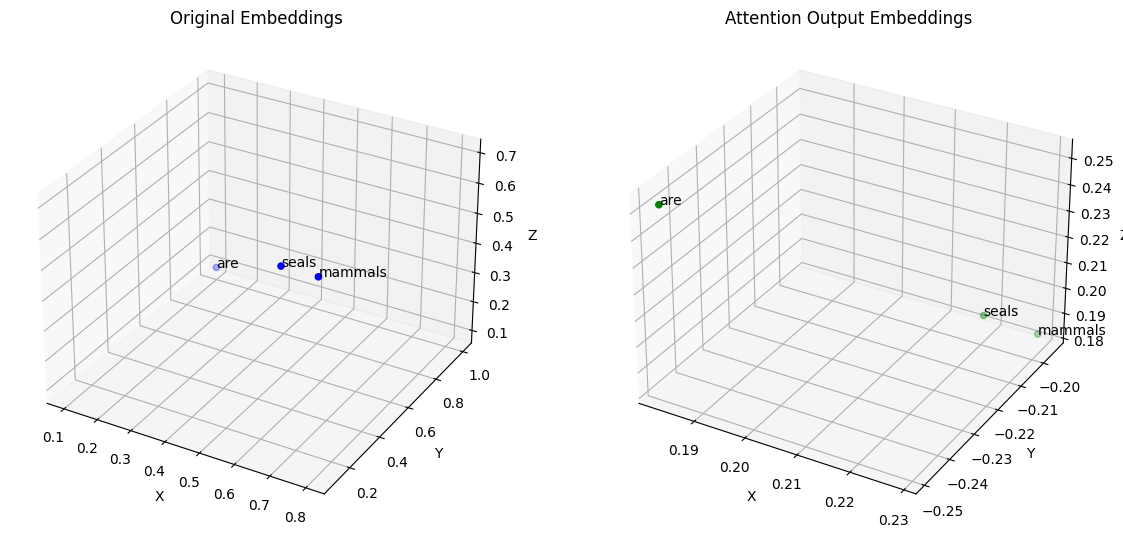

In [ ]:
# In the code below we are:
#Defining embeddings for three words.
#Using pre-defined weight matrices to generate queries, keys, and values.
#Calculating attention scores, weights, and output.
#Plotting original embeddings and attention output in 3D.


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import softmax

# Encoder representations of four different words
word_1 = np.array([0.7, 0.1, 0.7])
word_2 = np.array([0.1, 1.0, 0.1])
word_3 = np.array([0.8, 0.1, 0.7])
#word_4 = np.array([0, 0, 1])

# Stacking the word embeddings into a single array
words = np.array([word_1, word_2, word_3])

# Generating the weight matrices
#np.random.seed(42)
#W_Q = np.random.randint(3, size=(3, 3))
#W_K = np.random.randint(3, size=(3, 3))
#W_V = np.random.randint(3, size=(3, 3))


W_Q=q
W_K=k
W_V=v

# Generating the queries, keys and values
Q = words @ W_Q
K = words @ W_K
V = words @ W_V



# Scoring the query vectors against all key vectors
scores = Q @ K.transpose()

# Computing the weights by a softmax operation
weights = softmax(scores / K.shape[1] ** 0.5, axis=1)

# Computing the attention by a weighted sum of the value vectors
 = weights @ V

# Plotting the embeddings and attention outputs
# Remove one word (let's remove word_4) for 3D plotting
words_to_plot = words[:3]
attention_to_plot = attention[:3]

fig = plt.figure(figsize=(14, 7))

# Original embeddings plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(words_to_plot[:, 0], words_to_plot[:, 1], words_to_plot[:, 2], color='blue')
for i, label in enumerate(['seals', 'are', 'mammals']):
    ax1.text(words_to_plot[i, 0], words_to_plot[i, 1], words_to_plot[i, 2], label)
ax1.set_title("Original Embeddings")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Attention output plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(attention_to_plot[:, 0], attention_to_plot[:, 1], attention_to_plot[:, 2], color='green')
for i, label in enumerate(['seals', 'are', 'mammals']):
    ax2.text(attention_to_plot[i, 0], attention_to_plot[i, 1], attention_to_plot[i, 2], label)
ax2.set_title("Attention Output Embeddings")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.show()


The visualization shows that the attention mechanism has pushed away the word "are," while bringing "seals" and "mammals" closer together, demonstrating that it focuses on the correct words. Despite the QKV matrices being initialized randomly, the attention remains focused on the relevant words, even though the resulting positions in the embedding space differ each time that the code is run.

In [ ]:
attention

array([[ 0.22177987, -0.20313328,  0.1936999 ],
       [ 0.18234888, -0.24927167,  0.25210221],
       [ 0.22883756, -0.1948938 ,  0.1831917 ]])